In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import keras
from keras.models import load_model
import cv2

emotion_dict = {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}

Using TensorFlow backend.


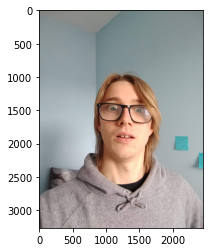

In [2]:
image = face_recognition.load_image_file("emotions/surprise2.jpg")
plt.imshow(image)

In [3]:
face_locations = face_recognition.face_locations(image)
print(face_locations)

[(1256, 1788, 2215, 830)]


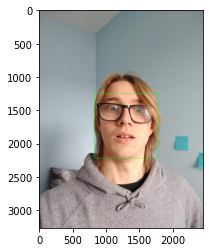

In [4]:
top, right, bottom, left = face_locations[0]

border = 4

cv2.rectangle(image, (left - border, top - border), (right + border // 2, bottom + border // 2), (0, 255, 0), border)
plt.imshow(image)

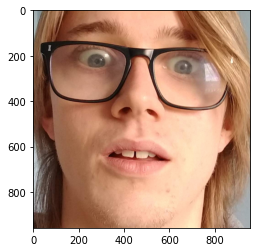

In [5]:
face_image = image[top:bottom, left:right]
plt.imshow(face_image)

In [6]:
print(face_image.shape)

(959, 958, 3)


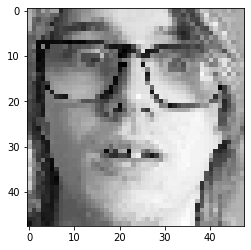

In [7]:
face_image = cv2.resize(face_image, (48, 48))
face_image = cv2.cvtColor(face_image, cv2.COLOR_RGB2GRAY)
plt.imshow(face_image, cmap="gray")
face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])

In [8]:
model = load_model("face_and_emotion_detection/emotion_detector_models/model_v6_23.hdf5")
# print(face_image.shape)

In [9]:
predicted_class = np.argmax(model.predict(face_image))

In [10]:
label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]
print(predicted_label)

Surprise
